#1- Changing the Machine Learning technique
The strategy originally implemented a linear regression model (Bayesian Ridge). It was replaced by a different linear model to keep simplicity within this practice. The chosen model was Lasso. `sklearn.linear_model.Lasso()`

```
def get_model():
    """This is a constructor for the ML model (Bayesian Ridge) which can be easily
       modified for using different models.
    """
    model = linear_model.Lasso(alpha=0.1, tol=0.0001)

    return model
```

## Why the Lasso model?
Lasso (Least Absolute Shrinkage and Selection Operator) can be useful in certain scenarios for predicting whether stock prices will rise or fall, especially in the context of linear supervised learning.
* Lasso applies L1 regularization, which penalizes the absolute magnitude of coefficients. This regularization forces some coefficients to shrink exactly to zero, effectively performing automatic feature selection.
* By regularizing large coefficients, Lasso reduces the model's complexity, helping to mitigate overfitting in noisy datasets like stock prices.
* The sparsity induced by Lasso (many coefficients set to zero) leads to simpler models that are easier to interpret, especially when analyzing the relationships between features and stock price movement.

# 2- Changing market from NASDAQ to S&P500
Quantiacs provides historic, split adjusted, data for more than 750 stocks, all have been S&P500 index constituents at some point from 2006. The S&P500 data can be obtained via the `qndata.stocks.load_spx_data()` function.
```
#loading the s&p500 data
stock_data = qndata.stocks.load_spx_data(tail = (365 * 5))
```

#3- Assets to use in the model
The S&P500 assets chosen for this exercise are the following:

* "NAS:AAPL" - Apple
* "NAS:ADP" - Automatic Data Processing
* "NAS:AVGO" - Broadcom
* "NAS:BKNG" - Booking Holdings
* "NAS:CERN" - Cerner Corp
* "NAS:COST" - Costco Wholesale Corp
* "NAS:DTV" - DIRECTV
* "NAS:BKR" - Baker Hughes Company
* "NAS:FOX" - Fox Corp
* "NAS:GOOG" - Alphabet C
* "NAS:GOOGL" - Alphabet A
* "NAS:JAVA" - SUN MICROSYSTEMS INC
* "NAS:LOGI" - Logitech International SA
* "NAS:MELI" - MercadoLibre
* "NAS:NFLX" - Netflix
* "NAS:QCOM" - QUALCOMM
* "NAS:TEAM" - Atlassian Corp
* "NAS:TMUS" - T-Mobile US
* "NAS:TSLA" - Tesla
* "NAS:UAL" - United Airlines Holdings

These stocks are hightly focused on technology and/or digital media and sales. As such, these types of markets have notable variations in supply and demand, as well as profitabiity. Therefore, it was determined this group of assets would work best for training the trading model.

```
stock_data = qndata.stocks.load_spx_data(tail = (365 * 5), assets =
                                         [
                                             "NAS:AAPL", # Apple
                                             "NAS:ADP", # Automatic Data Processing
                                             "NAS:AVGO", # Broadcom
                                             "NAS:BKNG", # Booking Holdings
                                             "NAS:CERN", # Cerner Corp
                                             "NAS:COST", # Costco Wholesale Corp
                                             "NAS:DTV", # DIRECTV
                                             "NAS:BKR", # Baker Hughes Company
                                             "NAS:FOX", # Fox Corp
                                             "NAS:GOOG", # Alphabet C
                                             "NAS:GOOGL", # Alphabet A
                                             "NAS:JAVA", # SUN MICROSYSTEMS INC
                                             "NAS:LOGI", # Logitech International SA
                                             "NAS:MELI", # MercadoLibre
                                             "NAS:NFLX", # Netflix
                                             "NAS:QCOM", # QUALCOMM
                                             "NAS:TEAM", # Atlassian Corp
                                             "NAS:TMUS", # T-Mobile US
                                             "NAS:TSLA", # Tesla
                                             "NAS:UAL" # United Airlines Holdings
                                         ]
                                        )
```

#4- Variable changes
Not many new variables have been added at the time, as most of the attmepts made so far have not worked in the existing exercise.
* Only one new variable has worked with and improved the results, the `shifted_data` variable, which obtains values from previous or next days, depending on how it's configured.
```
    # shifted data, prices from the previous or next day(s) (momentum):
    shifted_data = qnta.shift(data.sel(field="close"), periods=-21)

    # combine the seven features:
    result = xr.concat(
        [trend, macd2_signal.sel(field="close"), volatility,  d, rsi, price, shifted_data],
        pd.Index(
            ["trend",  "macd", "volatility", "stochastic_d", "rsi", "price", "shifted_data"],
            name = "field"
        )
    )

    return result.transpose("time", "field", "asset")
```



Also, some of the parameters within the existing variables have been tweaked in order to improve the Sharpe Ratio. The changes made are focused on parameters that imply market periods of time, that might impact the assets' values.

The variable changes in question so far are:
* Trend
```
# trend:
    # BEFORE:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 1)
    # AFTER:
    trend = qnta.roc(qnta.lwma(data.sel(field="close"), 60), 2)
```
* The Stochastic Oscillator
```
# the stochastic oscillator:
    # BEFORE:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), datasel(field="close"), 14)
    # AFTER:
    k, d = qnta.stochastic(data.sel(field="high"), data.sel(field="low"), datasel(field="close"), 21)
```





# Sharpe Ratio graph
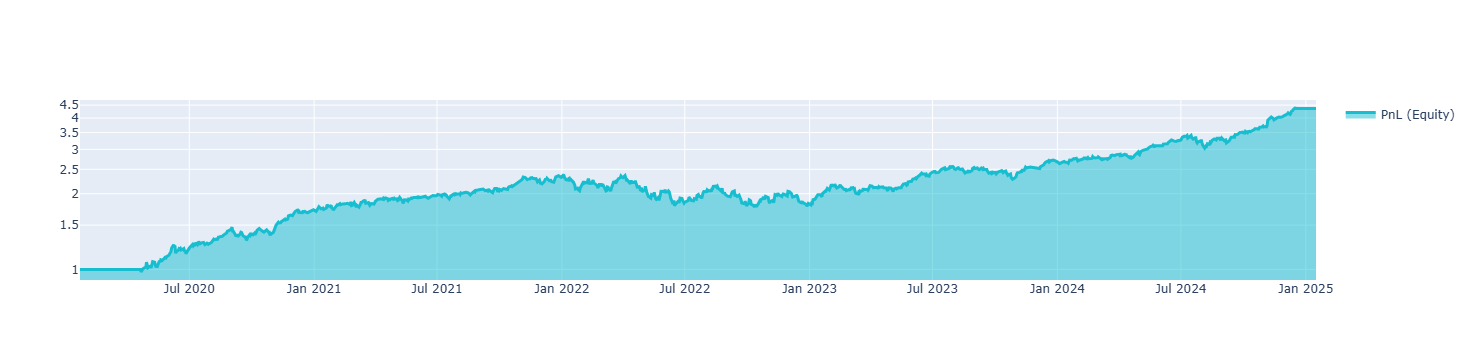

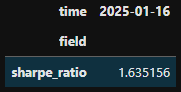